In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import datetime
import pandas as pd
import cupy as cp
from plotly.offline import plot, init_notebook_mode, iplot
from mpl_toolkits.mplot3d import Axes3D
import plotly.graph_objects as go
import plotly.tools as tls

from aia_part.get_aia_simu import get_aia_simu

C:\Users\14902\anaconda3\envs\sdo2022\lib\site-packages\tqdm\auto.py:21: TqdmWarning:

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html



## read eve csv

In [2]:
eve_file="eve_part/data/daily_date.csv"

In [3]:
eve_frame=pd.read_csv(eve_file)

date=[]
for i in eve_frame['date']:
    date.append(datetime.datetime.strptime(i, '%Y-%m-%d'))
    
eve_frame['date']=date
eve_frame=eve_frame.set_index('date')

In [4]:
eve_frame.head()

,daily_mean,daily_stddev
date,,
2011-01-11,30.374087,0.000191
2011-01-12,30.374090,0.000170
2011-01-13,30.374055,0.000182
2011-01-14,30.374055,0.000181
2011-01-15,30.374071,0.000179


## get aia data 

In [5]:
t=get_aia_simu(800,0.9,-0.01)

In [6]:
t

{datetime.datetime(2011, 2, 3, 0, 0): -0.0055244013135178184,
 datetime.datetime(2011, 2, 4, 0, 0): -0.005524148139134309,
 datetime.datetime(2011, 2, 5, 0, 0): -0.005438726304341313,
 datetime.datetime(2011, 2, 6, 0, 0): -0.00538559208555131,
 datetime.datetime(2011, 2, 7, 0, 0): -0.005380238002887313,
 datetime.datetime(2011, 2, 8, 0, 0): -0.005370805160654985,
 datetime.datetime(2011, 2, 9, 0, 0): -0.005491323812662849,
 datetime.datetime(2011, 2, 10, 0, 0): -0.005550477701692044,
 datetime.datetime(2011, 2, 11, 0, 0): -0.005658658884019755,
 datetime.datetime(2011, 2, 12, 0, 0): -0.005716386196403656,
 datetime.datetime(2011, 2, 13, 0, 0): -0.00573158371123837,
 datetime.datetime(2011, 2, 14, 0, 0): -0.005759782171770756,
 datetime.datetime(2011, 2, 15, 0, 0): -0.005738810809867577,
 datetime.datetime(2011, 2, 16, 0, 0): -0.005636677742442638,
 datetime.datetime(2011, 2, 17, 0, 0): -0.005622681102558146,
 datetime.datetime(2011, 2, 18, 0, 0): -0.005433559267019362,
 datetime.dateti

In [31]:
a=[1,2]
b=cp.array([3,4])
dict(zip(a,b))

{1: array(3), 2: array(4)}

In [7]:
aia_simu_data={
               'date':list(t.keys()),
               'daily_mean':list(t.values()),
                }

aia_frame=pd.DataFrame(aia_simu_data)
aia_frame=aia_frame.set_index('date')
aia_frame.head()

,daily_mean
date,
2011-02-03,-0.005524
2011-02-04,-0.005524
2011-02-05,-0.005439
2011-02-06,-0.005386
2011-02-07,-0.005380


## calculate error

In [8]:
aia_frame.loc[index]['daily_mean']

NameError: name 'index' is not defined

In [18]:
eve_frame.loc[index]['daily_mean']

30.37346164352515

In [9]:
error=0
for index in aia_frame.index:
    if index in eve_frame.index:
        error+=(aia_frame.loc[index]['daily_mean']-
                eve_frame.loc[index]['daily_mean']+30.3781)**2
error

4.030038373143986e-05

## 3D visual

### 二元函数

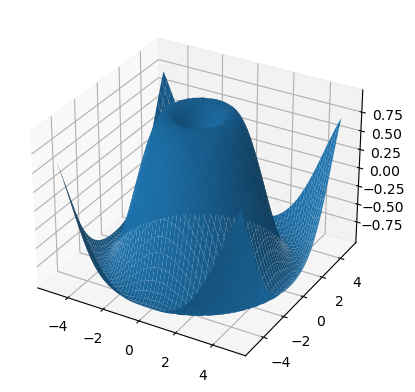

In [6]:
# Define the function to plot
def f(x, y):
    return np.sin(np.sqrt(x**2 + y**2))

# Create a grid of x and y values
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)

# Evaluate the function on the grid
Z = f(X, Y)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z)
plt.show()

In [5]:
ax.plot_surface?

Signature:
ax.plot_surface(
    X,
    Y,
    Z,
    *,
    norm=None,
    vmin=None,
    vmax=None,
    lightsource=None,
    **kwargs,
)
Docstring:
Create a surface plot.

By default, it will be colored in shades of a solid color, but it also
supports colormapping by supplying the *cmap* argument.

.. note::

   The *rcount* and *ccount* kwargs, which both default to 50,
   determine the maximum number of samples used in each direction.  If
   the input data is larger, it will be downsampled (by slicing) to
   these numbers of points.

.. note::

   To maximize rendering speed consider setting *rstride* and *cstride*
   to divisors of the number of rows minus 1 and columns minus 1
   respectively. For example, given 51 rows rstride can be any of the
   divisors of 50.

   Similarly, a setting of *rstride* and *cstride* equal to 1 (or
   *rcount* and *ccount* equal the number of rows and columns) can use
   the optimized path.

Parameters
----------
X, Y, Z : 2D arrays
    Data values

In [17]:
def f(x, y):
    return np.sin(np.sqrt(x**2 + y**2))

# Create a grid of x and y values
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
X, Y = np.meshgrid(x, y)

# Evaluate the function on the grid
Z = f(X, Y)

# Create a 3D plot
fig = go.Figure(data=[go.Surface(z=Z,x=X, y=Y)])
# fig.show()
fig.write_html('my_plot.html')

#这玩意 inline jupyter 会报错

In [16]:

# Read data from a csv
z_data = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/api_docs/mt_bruno_elevation.csv')
z = z_data.values
sh_0, sh_1 = z.shape
x, y = np.linspace(0, 1, sh_0), np.linspace(0, 1, sh_1)
fig = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
fig.update_layout(title='Mt Bruno Elevation', autosize=False,
                  width=500, height=500,
                  margin=dict(l=65, r=50, b=65, t=90))
fig.show()
fig.write_html('my_plot.html')

### 三元函数

In [22]:
def f(x, y,z):
    # return np.sin(np.sqrt(x**2 + y**2+z**2))
    return x+y+z

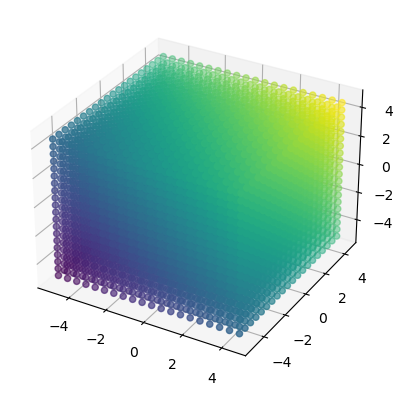

In [30]:

# Define the function
def f(x,y,z):
    return x+y+z

# Create the 3D grid
X, Y, Z = np.meshgrid(np.arange(-5, 5, 0.5),
                      np.arange(-5, 5, 0.5),
                      np.arange(-5, 5, 0.5))

# Evaluate the function over the grid
F = f(X,Y,Z)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X, Y, Z, c=F, cmap='viridis')

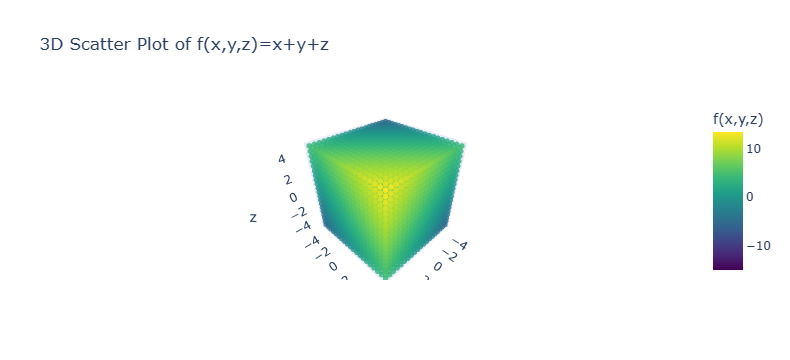

In [36]:
# Define the function
def f(x, y, z):
    return x + y + z

# Create the data
x, y, z = np.meshgrid(np.arange(-5, 5, 0.5), np.arange(-5, 5, 0.5), np.arange(-5, 5, 0.5))
values = f(x, y, z)

# Create the trace
trace = go.Scatter3d(
    x=x.ravel(),
    y=y.ravel(),
    z=z.ravel(),
    mode='markers',
    marker=dict(
        size=3,
        color=values.ravel(),
        colorscale='Viridis',
        opacity=0.8,
        colorbar=dict(
            title='f(x,y,z)',
        ),
    )
)


# In the Plotly code I provided earlier, you might have noticed the following line:

# x=x.ravel()

# This line is used to convert a 3D array into a 1D array.
# In the context of creating a 3D scatter plot using Plotly, we need to provide the x, y, and z coordinates 
# of each point as separate arrays. The numpy.meshgrid function creates three 3D arrays of the same shape, 
# one for each variable. However, Plotly expects the coordinates of each point to be stored in 1D arrays.


# Create the layout
layout = go.Layout(
    title='3D Scatter Plot of f(x,y,z)=x+y+z',
    scene=dict(
        xaxis_title='x',
        yaxis_title='y',
        zaxis_title='z'
    )
)

# Create the figure
fig = go.Figure(data=[trace], layout=layout)

# Show the figure
fig.show()
fig.write_html('3d_test.html')

In [39]:
np.shape(x)

(20, 20, 20)

In [40]:
np.shape(values)

(20, 20, 20)

#### wrap it into a function

In [6]:
def plot_3d(x,y,z,values,output_filename=None):
    '''
    

    Parameters
    ----------
    x : shape : (a,b,c)
    y : shape : (a,b,c)
    z : shape : (a,b,c)
    values: shape : (a,b,c)
    output_filename : 

    Returns
    -------
    None.

    '''
    
    # Create the trace
    trace = go.Scatter3d(
        x=x.ravel(),
        y=y.ravel(),
        z=z.ravel(),
        mode='markers',
        marker=dict(
            size=3,
            color=values.ravel(),
            colorscale='Viridis',
            opacity=0.8,
            colorbar=dict(
                title='f(x,y,z)',
            ),
        )
    )

    # Create the layout
    layout = go.Layout(
        title='3D Scatter Plot of f',
        scene=dict(
            xaxis_title='x',
            yaxis_title='y',
            zaxis_title='z'
        ),
        width=800,  # set the width of the plot to 600 pixels
        height=800,  # set the height of the plot to 600 pixels
    )

    # Create the figure
    fig = go.Figure(data=[trace], layout=layout)

    # Show the figure
    fig.show()
    
    if output_filename:
        fig.write_html(output_filename)

In [60]:
if 'tes':
    print('tes')

tes


In [8]:
x, y, z = np.meshgrid(np.arange(-5, 5, 0.5), np.arange(-5, 5, 0.5), np.arange(-5, 5, 0.5))
values=x+y**2-z

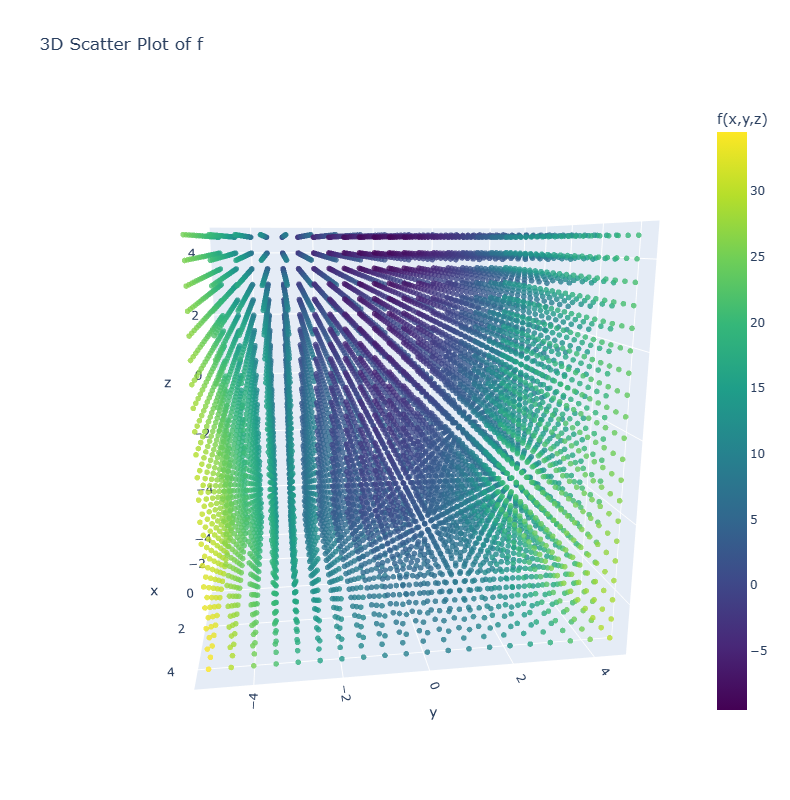

In [9]:
plot_3d(x,y,z,values)